<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/_3_3_%EC%BC%80%EB%9D%BC%EC%8A%A4_Fashion_MNIST_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt


### 데이터셋 로드

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, random_state =111, test_size =0.3)

4422102/4422102 [==============================] - 0s 0us/step


### 데이터 확인

In [ ]:
print('학습데이터 :{}\t 레이블 : {}:'.format(x_train_full.shape, y_train_full.shape))
print('학습데이터 :{}\t 레이블 : {}:'.format(x_train.shape, y_train.shape))
print('학습데이터 :{}\t 레이블 : {}:'.format(x_val.shape, y_val.shape))
print('학습데이터 :{}\t 레이블 : {}:'.format(x_test.shape, y_test.shape))

학습데이터 :(60000, 28, 28)	 레이블 : (60000,):
학습데이터 :(42000, 28, 28)	 레이블 : (42000,):
학습데이터 :(18000, 28, 28)	 레이블 : (18000,):
학습데이터 :(10000, 28, 28)	 레이블 : (10000,):


In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
class_name[y_test[0]]

'Ankle boot'

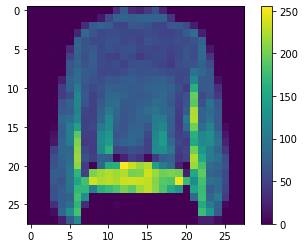

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

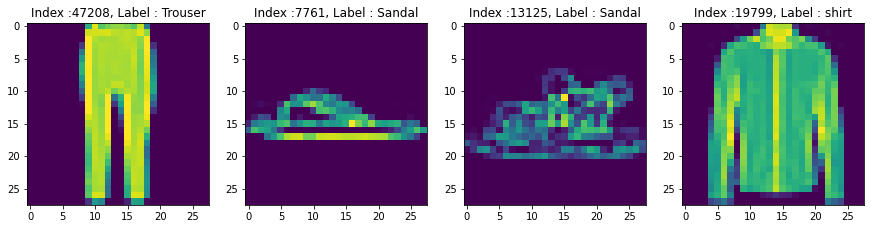

In [ ]:
num_sample = 4
random_idxs = np.random.randint(60000, size = num_sample)

plt.figure(figsize = (15,10))
for i , idx in enumerate(random_idxs):
  image = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(image)
  plt.title('Index :{}, Label : {}'.format(idx,class_name[label]))

### 데이터 전처리
- Normalization

- flatten

- oss='sparse_categorical_crossentropy'

In [ ]:
x_train = (x_train.reshape(-1, 28*28))/ 255.
x_val = (x_val.reshape(-1, 28*28))/255.
x_test = (x_test.reshape(-1, 28*28))/ 255.

### 모델 구성 (함수형 API)

In [ ]:
input = Input(shape=(784,), name = 'input')
hidden1 = Dense(256, activation = 'relu', name = 'hidden1')(input)
hidden2 = Dense(128, activation = 'relu', name = 'hidden2')(hidden1)
hidden3 = Dense(64, activation = 'relu', name = 'hidden3')(hidden2)
hidden4 = Dense(32, activation = 'relu', name = 'hidden4')(hidden3)
output = Dense(10, activation = 'softmax', name = 'output')(hidden4)
model = Model(inputs =[input], outputs = output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 hidden3 (Dense)             (None, 64)                8256      
                                                                 
 hidden4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable

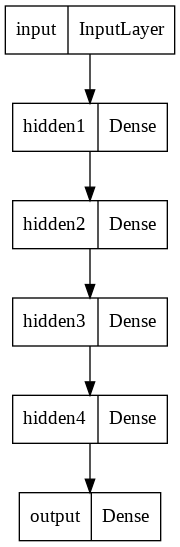

In [ ]:
plot_model(model)

### 모델 컴파일

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =RMSprop(learning_rate = 0.01),
              metrics =['acc'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
329/329 [==============================] - 4s 11ms/step - loss: 0.9888 - acc: 0.6956 - val_loss: 0.9856 - val_acc: 0.7206
Epoch 2/10
329/329 [==============================] - 3s 9ms/step - loss: 0.5415 - acc: 0.8098 - val_loss: 0.5175 - val_acc: 0.8249
Epoch 3/10
329/329 [==============================] - 3s 10ms/step - loss: 0.4851 - acc: 0.8295 - val_loss: 0.5703 - val_acc: 0.8235
Epoch 4/10
329/329 [==============================] - 4s 12ms/step - loss: 0.4621 - acc: 0.8391 - val_loss: 0.6169 - val_acc: 0.7779
Epoch 5/10
329/329 [==============================] - 3s 10ms/step - loss: 0.4449 - acc: 0.8452 - val_loss: 0.5464 - val_acc: 0.8274
Epoch 6/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4352 - acc: 0.8503 - val_loss: 0.5186 - val_acc: 0.8216
Epoch 7/10
329/329 [==============================] - 3s 9ms/step - loss: 0.4335 - acc: 0.8539 - val_loss: 0.6154 - val_acc: 0.7927
Epoch 8/10
329/329 [==============================] - 3s 10ms/step - los

### 학습 결과 시각화

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

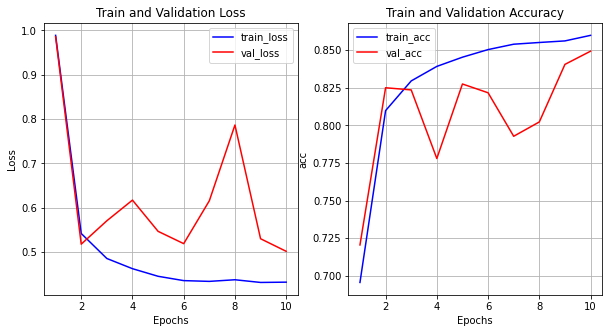

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) +1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('acc')
ax2.grid()
ax2.legend()

plt.show()

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =SGD(learning_rate = 0.01),
              metrics =['acc'])

In [ ]:
history2 = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3344 - acc: 0.8829 - val_loss: 0.4364 - val_acc: 0.8714
Epoch 2/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3153 - acc: 0.8855 - val_loss: 0.4609 - val_acc: 0.8557
Epoch 3/10
329/329 [==============================] - 3s 8ms/step - loss: 0.3130 - acc: 0.8851 - val_loss: 0.4226 - val_acc: 0.8721
Epoch 4/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3105 - acc: 0.8850 - val_loss: 0.4373 - val_acc: 0.8709
Epoch 5/10
329/329 [==============================] - 3s 9ms/step - loss: 0.3078 - acc: 0.8863 - val_loss: 0.4246 - val_acc: 0.8734
Epoch 6/10
329/329 [==============================] - 3s 10ms/step - loss: 0.3069 - acc: 0.8867 - val_loss: 0.4253 - val_acc: 0.8704
Epoch 7/10
329/329 [==============================] - 4s 12ms/step - loss: 0.3051 - acc: 0.8880 - val_loss: 0.4196 - val_acc: 0.8756
Epoch 8/10
329/329 [==============================] - 4s 12ms/step - loss:

In [ ]:
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

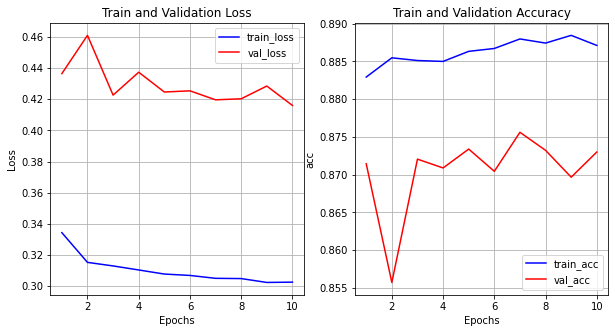

In [ ]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) +1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('acc')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5025 - acc: 0.8647


[0.5024752020835876, 0.8647000193595886]

### 학습된 모델을 통해 값 예측

In [ ]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision = 7)
print(pred_ys[0])

                        

313/313 [==============================] - 1s 4ms/step
(10000, 10)
[3.4853247e-18 1.6307586e-22 2.1955962e-16 1.6255639e-25 8.7743653e-29
 2.7090399e-02 2.2269148e-17 4.1900828e-02 3.9266715e-13 9.3100882e-01]


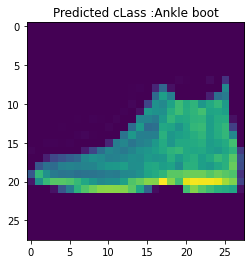

In [ ]:
arg_pred_y = np.argmax(pred_ys, axis = 1)

plt.imshow(x_test[0].reshape(-1,28))

plt.title('Predicted cLass :{}'.format(class_name[arg_pred_y[0]]))

plt.show()

In [ ]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}{:2.0f}({})".format(class_name[predicted_label],
                                    100*np.max(pred_ys),
                                    class_name[y_test]),
                                    color = color)
def plot_value_array(i, pred_ys,true_label):
  pred_ys, true_label = pred_ys[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_ys, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(pred_ys)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


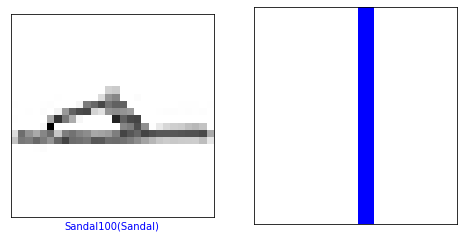

In [ ]:
i = 154
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,28,28))

plt.subplot(1,2,2)
plot_value_array(i, pred_ys, y_test)
plt.show()

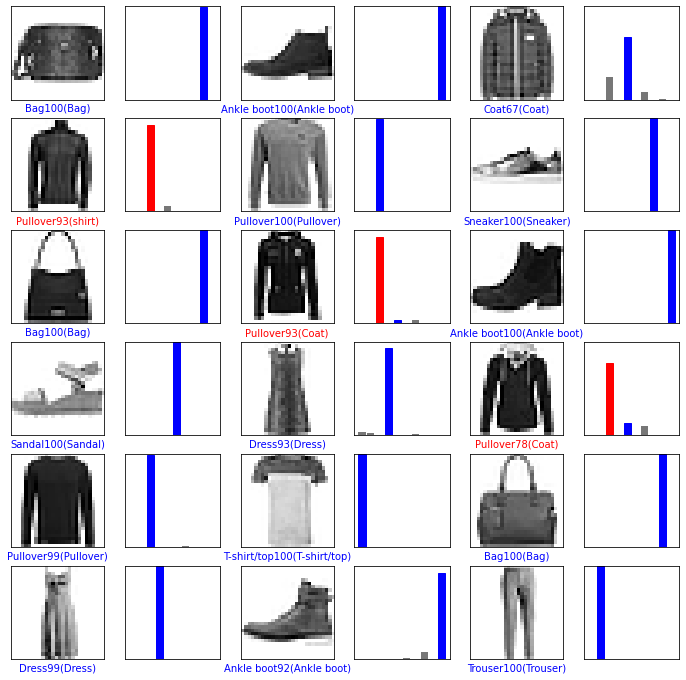

In [ ]:
num_rows = 6
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size = num_images)

plt.figure(figsize =(2*2*num_cols, 2*num_rows))

for idx, num  in enumerate(random_num):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1,28,28))
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(num, pred_ys, y_test)
 
plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.utils import to_categorical

In [ ]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

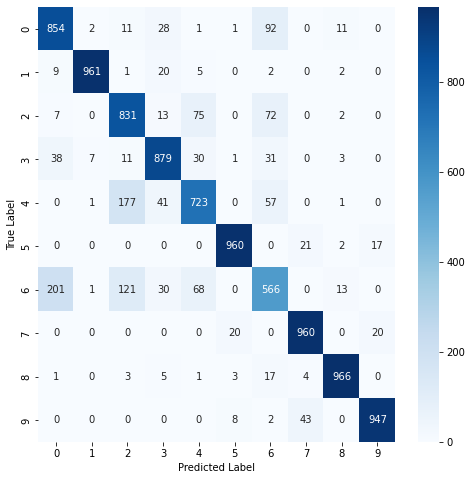

In [ ]:
plt.figure(figsize = (8,8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis= -1), np.argmax(pred_ys, axis =-1))
sns.heatmap(cm2, annot = True, fmt ='d', cmap = 'Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [ ]:
print(classification_report(np.argmax(y_test_che, axis = -1), np.argmax(pred_ys, axis = -1)))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.72      0.83      0.77      1000
           3       0.87      0.88      0.87      1000
           4       0.80      0.72      0.76      1000
           5       0.97      0.96      0.96      1000
           6       0.67      0.57      0.62      1000
           7       0.93      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

